In [11]:
!pip install opencv-python
!pip install opencv-python-headless

In [12]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files


In [13]:
# Upload the video file
uploaded = files.upload()

# Get the video path after upload
video_path = next(iter(uploaded))


Saving 0.jpg to 0 (1).jpg


In [14]:
# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [15]:
# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")


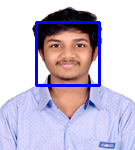

error: OpenCV(4.11.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [16]:
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()

    if not ret:
        break  # Break the loop if no more frames are available

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

    # Display the resulting frame with faces detected
    cv2_imshow(frame)
    cv2.waitKey(1)

